# **Regression Project: Boston House Price Prediction**


Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
# **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
# **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

# **Importing the necessary libraries**

In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import pylab as py

from sklearn.preprocessing import StandardScaler

from statsmodels.graphics.gofplots import ProbPlot

from statsmodels.formula.api import ols

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from scipy import stats

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [3]:
# Load the dataset
df = pd.read_csv("Boston.csv")

# Data Overview

In [3]:
# Summary of first rows of the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
# Check number of rows and columns
df.shape

(506, 13)

**Observations:**

The dataset has **13 columns and 506 rows**. Each row corresponds to a house in a Boston suburb or town.

In [5]:
# View a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Observations:**

There are **no missing values** in the dataset and **all variables are numeric** (integer or float).

In [6]:
# Confirm there are no missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
# Check how many unique values are in the dataset
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
LSTAT      455
MEDV       229
dtype: int64

**Observations:**

Most variables have unique values, except from CHAS which takes two values and indicates proximity to Charles River, or RAD which takes nine values and represents an accesibility index.

In [8]:
# Conduct a statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**Observations:**

Crime rates per capita have a mean value of 3.6 across towns, ranging from nearly 0% to almost 90% in some towns.

Most houses are not located near the river (CHAS has a mean value of 0.069) and the average distance to Boston employment centers is 3.8 kilometers (ranging from 1.1km to 12.1km).

The average number of rooms per house is close to 6, while the average age of the houses is almost 70 years.

The average value of the owner-occupied houses is USD 22,532 (ranging from USD 5,000 to USD 50,000).


# Exploratory Data Analysis (EDA)

## Univariate Analysis

### Histograms

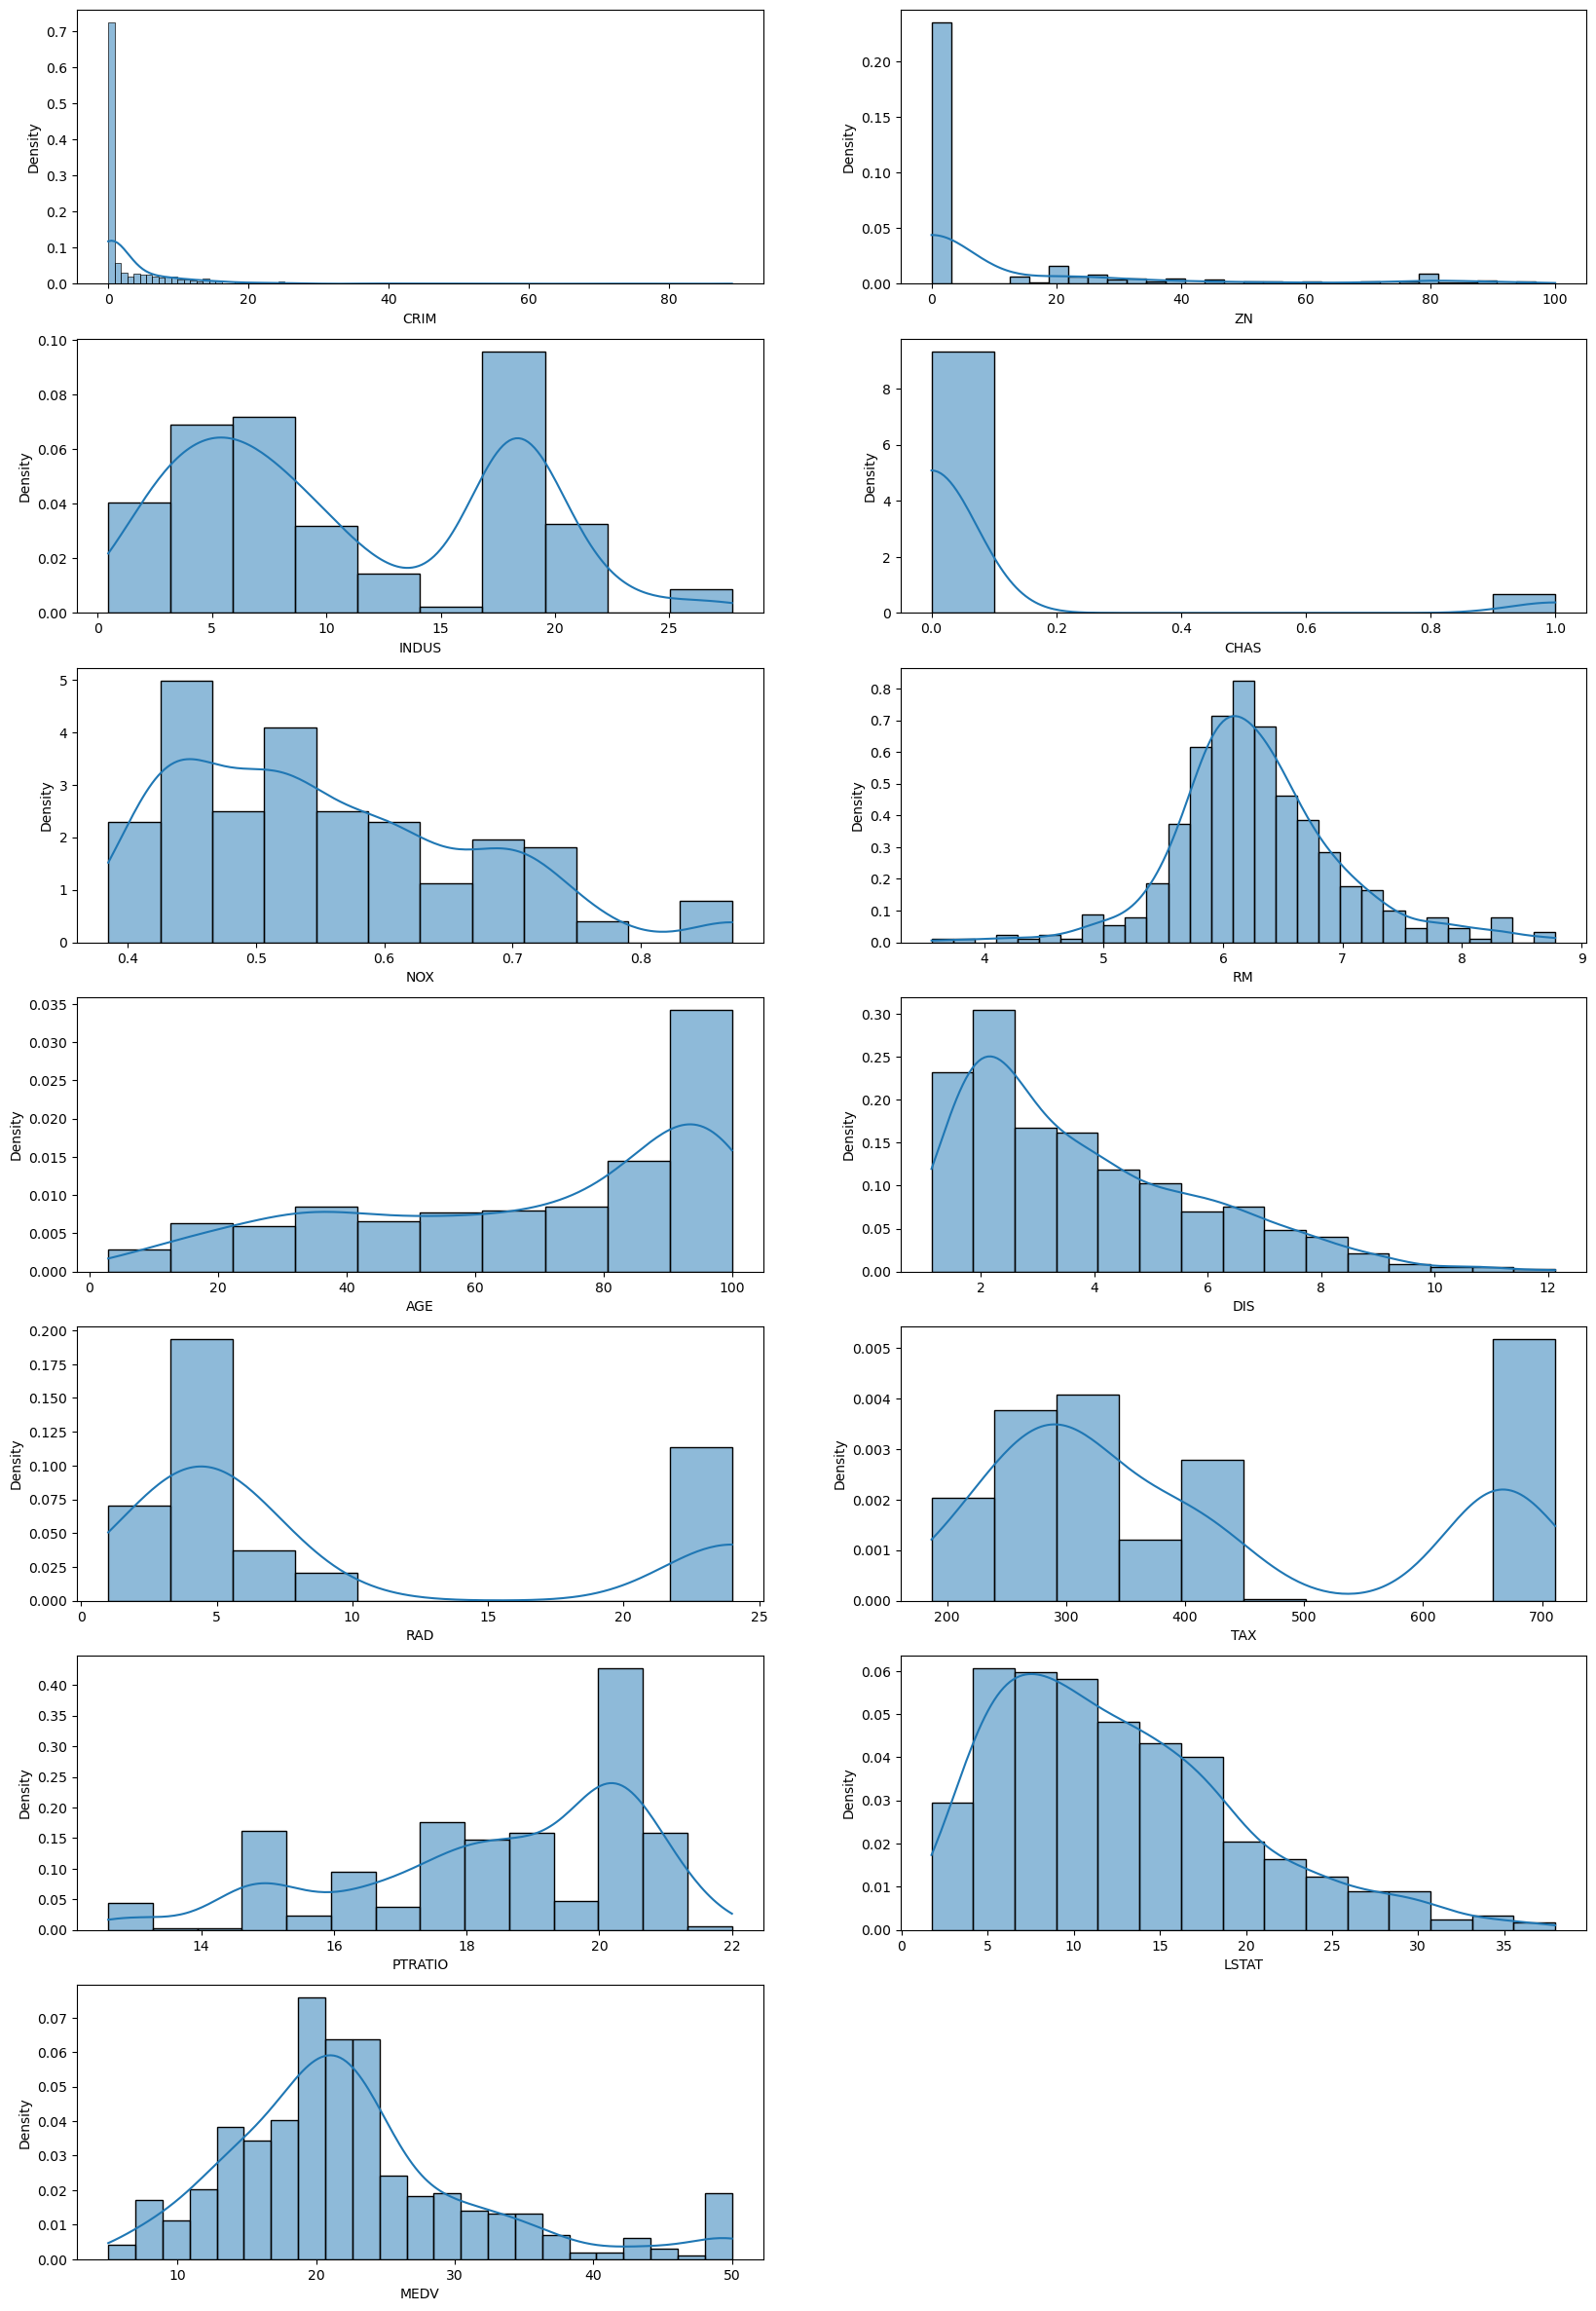

In [9]:
# Plot all the variables

# Create the figure and axes
fig, axes = plt.subplots(7, 2, figsize=(20,30))

axe = axes.ravel()

for col, ax in zip(df.columns, axe):
    sns.histplot(data = df[col], kde = True, stat='density', ax = ax)

# Check if there is something plotted in the chart
for ax in axe.flat:
    if not bool(ax.has_data()):
        fig.delaxes(ax)
    
plt.show()

**Observations:**

CRIM and ZN are highly skewed to the right and close to zero, suggesting that crime rates are generally small, whereas the proportion of residential land zoned for lots over 25,000 sq.ft. is almost nil across towns.

The variables INDUS and TAX are concentrated around two range of values, thus displaying a bimodal distribution. The pattern observed in the first variable suggest that houses are mostly in locations close to two industrial zones, and the latter indicates that tax rates are higher for high-value properties (at the end of the tail).

AGE is skewed to the left, indicating that most properties are predominantly old (over 80 years).

LSTAT is right-skewed. Its distribution follows a shape not uncommon for income (although this case, its shape indicates a higher proportion of the population with lower status).

DIS is skewed to the right, suggesting a short distance between most properties and employment centers.

Finally, we note that the variable MEDV is right-skewed, which may reflect the presence of high-value properties.

### Boxplots

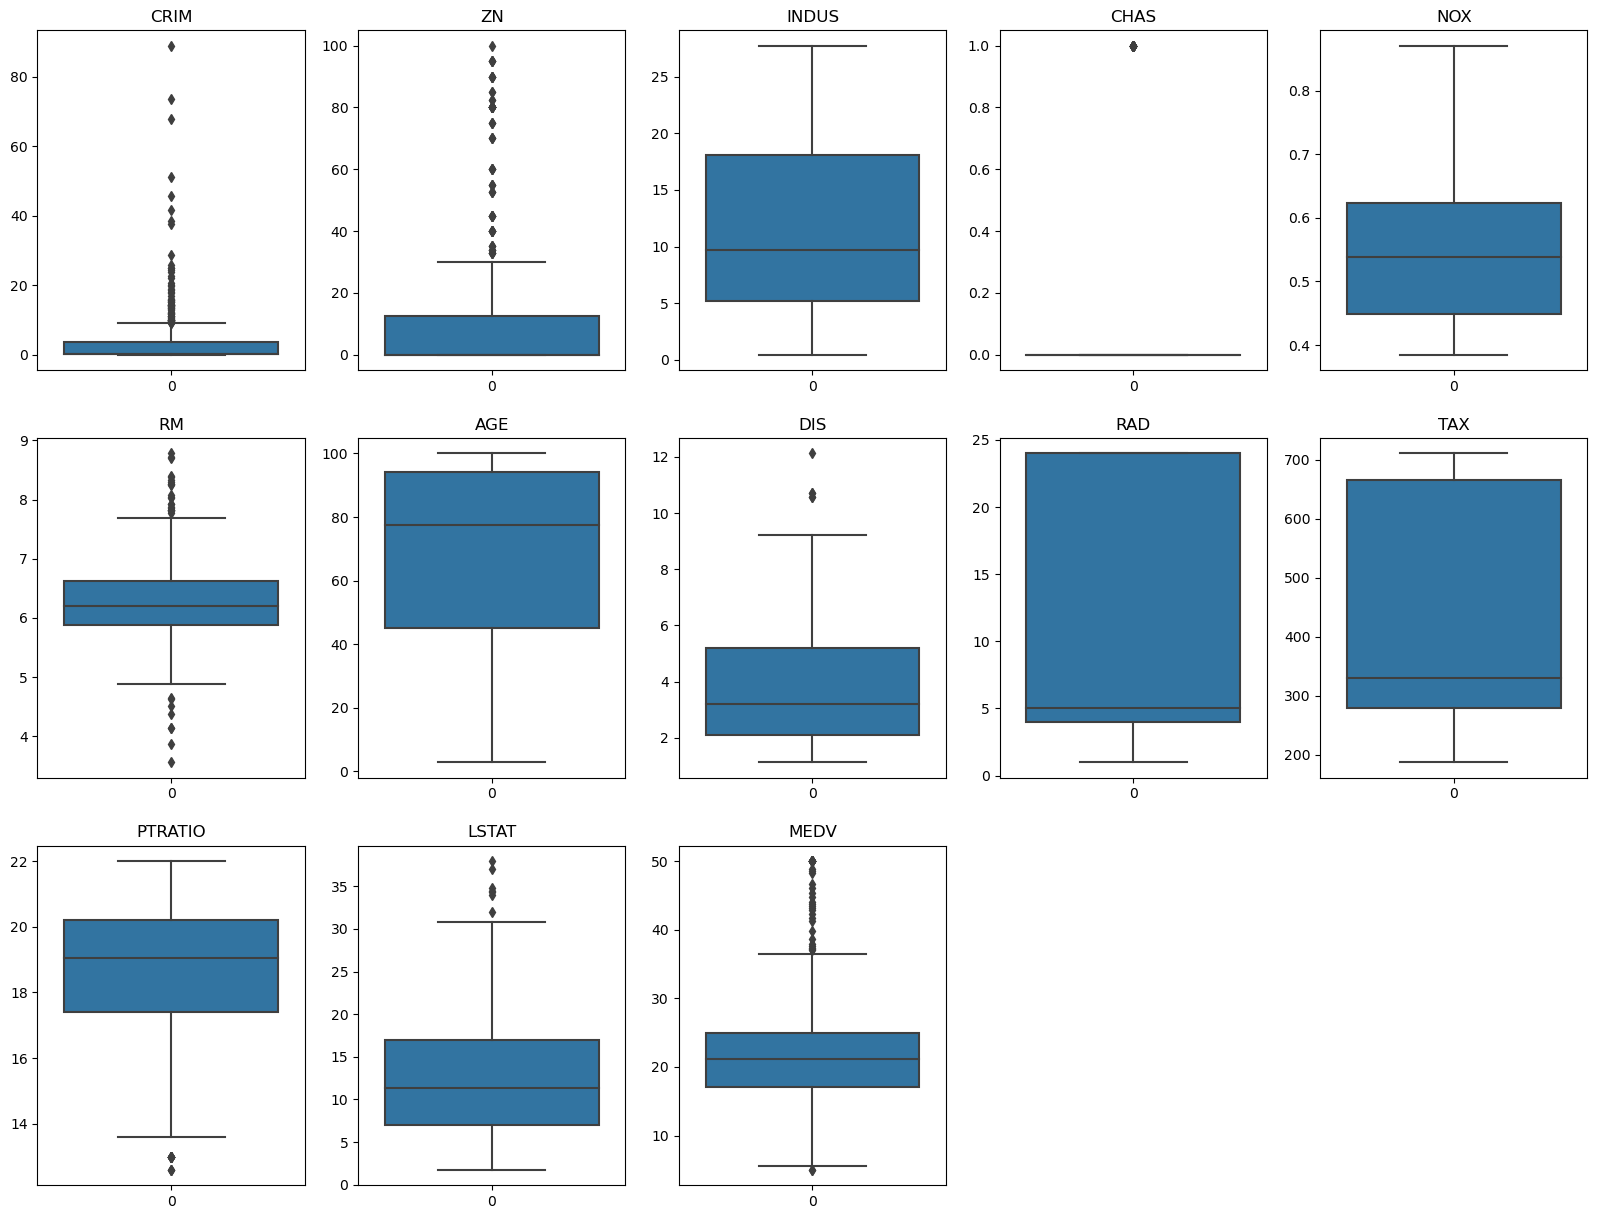

In [10]:
# Plot the boxplots for these variables (to detect outliers)

# Create the figure and axes
fig, axes = plt.subplots(3, 5, figsize=(20,15))

axe = axes.ravel()

for col, ax in zip(df.columns, axe):
    sns.boxplot(data = df[col], ax = ax)
    ax.set_title(str(col))

# Check if there is something plotted in the chart
for ax in axe.flat:
    if not bool(ax.has_data()):
        fig.delaxes(ax)
    
plt.show()

**Observations:**

The variables CRIM, ZN, RM, DIS, PTRATIO, LSTAT AND MEDV have several outliers. However, this is **not uncommon** for variables in the property market. So, we will keep all the observations across these variables.

## Bivariate Analysis

### Correlation heatmap

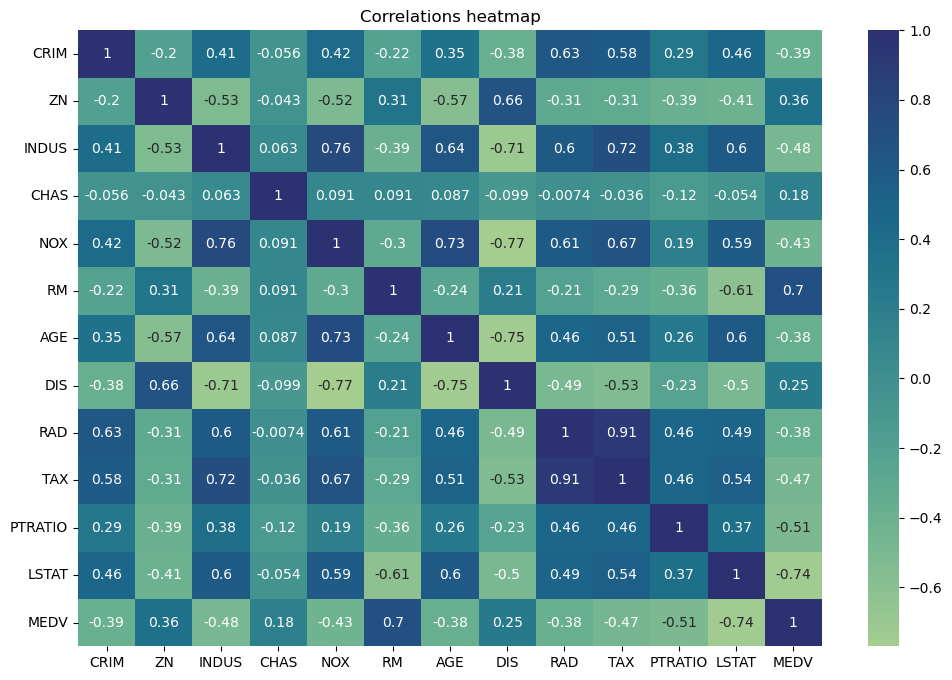

In [11]:
# Compute correlations and display the corresponding heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'crest')
plt.title('Correlations heatmap')

plt.show()

**Observations:**

INDUS is the variable that correlates the most with other variables (NOX, DIS, AGE, TAX).

Followed by NOX, which correlates with AGE, DIS, RAD and TAX.

The target variable (MEDV) is strongly correlated with RM and LSTAT.

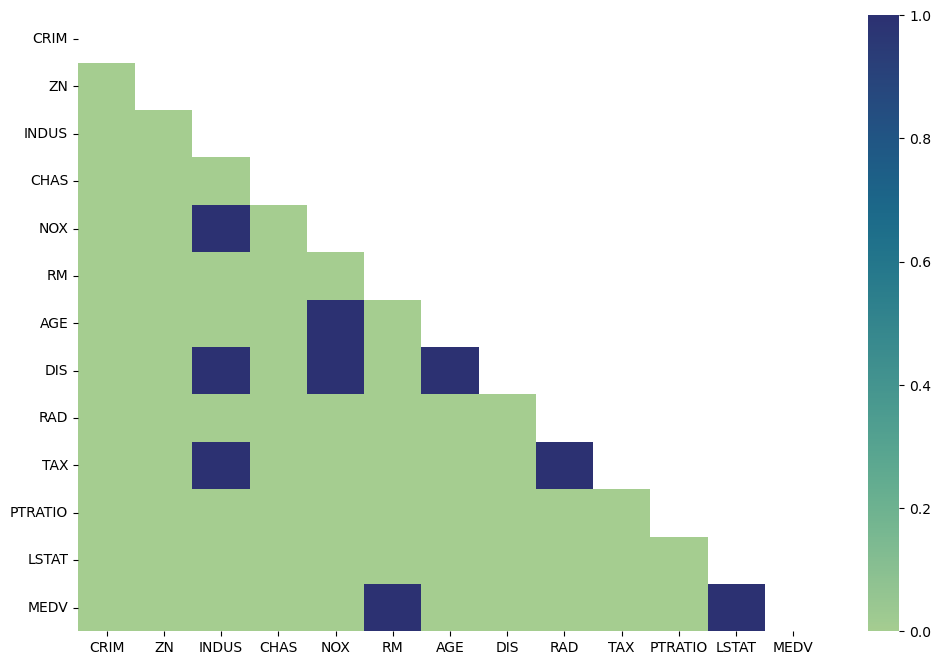

In [12]:
# Check which variables have a correlation greater than 0.7 or smaller than -0.7 (and differen to 1)
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(df.corr()))
xnames=df.corr().columns.values
sns.heatmap((df.corr() <= -0.69) | (df.corr() >= 0.69), annot = False, cmap = 'crest', mask = mask,
            xticklabels = xnames, yticklabels = xnames)

plt.show()

**Observations:**

We observe nine instances with variables showing correlation values less than -0.7 or greater than 0.7.

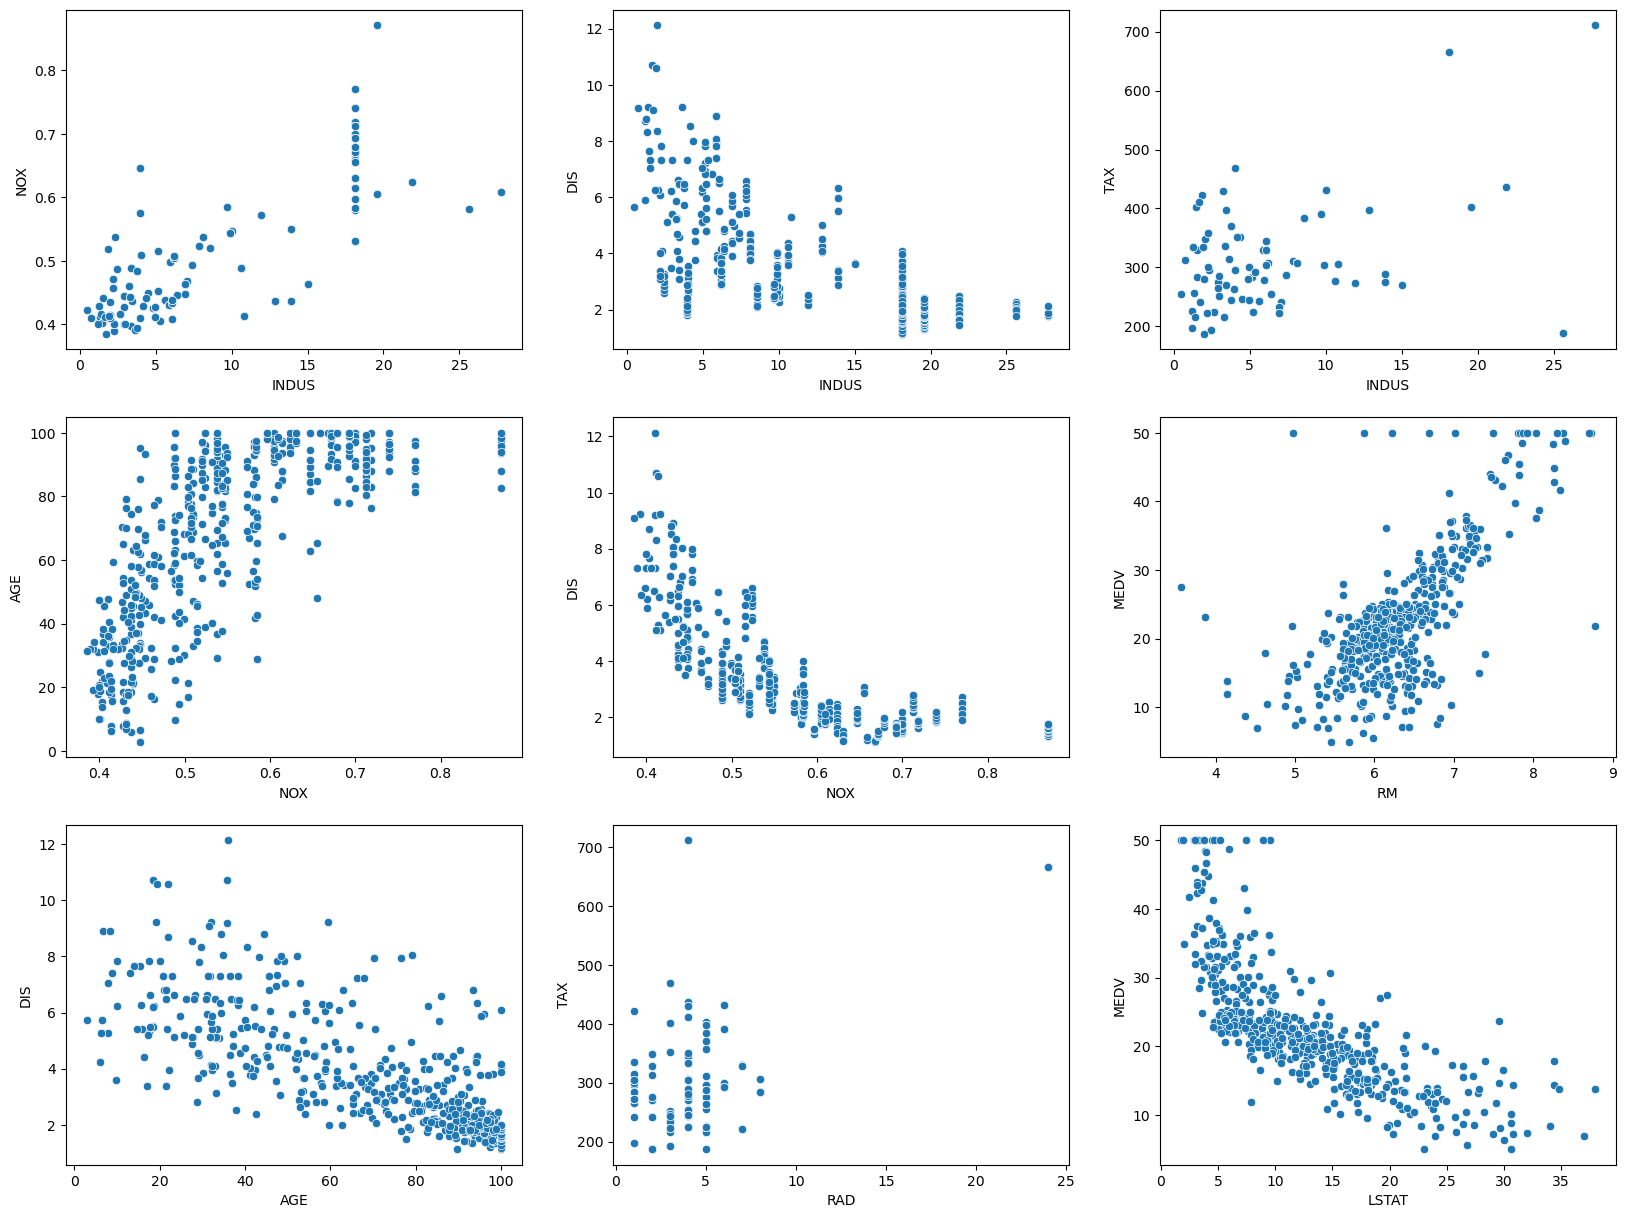

In [13]:
# Show the scatterplot for each of the pair of variables detected above
fig, axes = plt.subplots(3, 3, figsize=(20,15))

# For the variables correlated with INDUS
sns.scatterplot(x = 'INDUS', y = 'NOX', data = df, ax = axes[0,0])
sns.scatterplot(x = 'INDUS', y = 'DIS', data = df, ax = axes[0,1])
sns.scatterplot(x = 'INDUS', y = 'TAX', data = df, ax = axes[0,2])

# For the variables correlated with NOX
sns.scatterplot(x = 'NOX', y = 'AGE', data = df, ax = axes[1,0])
sns.scatterplot(x = 'NOX', y = 'DIS', data = df, ax = axes[1,1])

# For the variables correlated with RM 
sns.scatterplot(x = 'RM', y = 'MEDV', data = df, ax = axes[1,2])

# For the variables correlated with AGE 
sns.scatterplot(x = 'AGE', y = 'DIS', data = df, ax = axes[2,0])

# For the variables correlated with RAD 
sns.scatterplot(x = 'RAD', y = 'TAX', data = df, ax = axes[2,1])

# For the variables correlated with LSTAT 
sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df, ax = axes[2,2])

plt.show()

**Observations:**

INDUS has a strong positive correlation with NOX and TAX, while it is has a negative correlation with DIS. This situation suggests that large fractions of non-retail business acres have high levels of Nitric Oxide concentration linked to them, given that these acres are situated close to employment centers.

NOX is positively correlated with AGE and negatively correlated with DIS. The latter suggests that older houses are in locations with high levels of Nitric Oxide concentrations, which may owe itself to older houses being closer to employment centers.

RM has a positive correlation with MEDV, suggesting that more expensive houses have more rooms.

AGE has a negative correlation with DIS, indicating that older houses are near employment centers.

LSTAT has a negative correlation with MEDV, suggesting that house prices are lower in locations with a high proportion of people with low economic status. 

# Data Preprocessing

- As noted above, there are no missing values in the dataset.

- Given the relatively small number of variables in the dataset we will not implement feature engineering.

- We spotted some outliers across several variables, but it is not uncommon to observe this pattern in property market data.

### Variable transformations

However, we will apply transformations to 2 variables:

- **MEDV**: Apply the log function to center the price distribution

- **NOX**: Multiply by 10 to widen the range of values, so NOX will be re-scaled to measure '**parts per 1 million**' (instead of per 10 million)




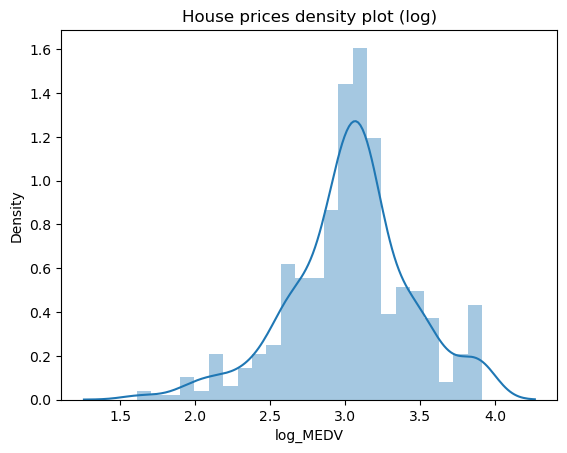

In [14]:
# Transform the dependent variable (MEDV) as its original distribution appears to be skewed
df['log_MEDV'] = np.log(df['MEDV'])

# Check the distribution of the transformed variable
sns.distplot(df['log_MEDV'], kde = True)
plt.title("House prices density plot (log)")

plt.show()

**Observations:**

We have applied a log-transformation to the dependent variable to remove any skewness. The distribution of the transformed variable displayed above now looks more centered around a single value.

This transformation of the dependent variable will be useful to interpret the results of the linear regression model.

In [15]:
# Re-scale NOX by multiplying the variable by a factor of 10 (for interpretation purposes)
df['NOX'] = 10*df['NOX']


# Model Building - Linear Regression

In [16]:
# Define the set of independent variables (X) and dependent variable (Y)
Y = df['log_MEDV']

X = df.drop(columns = {'MEDV', 'log_MEDV'})

In [17]:
# Split the dataset into the train and test data with a 80:20 rule
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)

In [18]:
# Add the intercept term
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

In [19]:
# Call the OLS algorithm on the train features (x_train) and train target variable (y_train)
ols_model_0 = sm.OLS(y_train, x_train)

# Fit the Model
ols_res_0 = ols_model_0.fit()

print(ols_res_0.summary())

                            OLS Regression Results                            
Dep. Variable:               log_MEDV   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     117.8
Date:                Fri, 21 Jul 2023   Prob (F-statistic):          1.02e-121
Time:                        09:52:39   Log-Likelihood:                 101.65
No. Observations:                 404   AIC:                            -177.3
Df Residuals:                     391   BIC:                            -125.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4875      0.222     20.194      0.0

**Observations:**

Before interpreting the coefficients of the OLS model, **we will perform a multicollinearity test.**

## Model Performance Check

### Multicollinearity

We will test for multicollinearity in the features of the model using the Variance Inflation Factor (VIF).

In [20]:
# Test for multicollinearity
vif_series = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index = x_train.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const      545.469224
CRIM         1.725903
ZN           2.515170
INDUS        3.812858
CHAS         1.072320
NOX          4.421201
RM           1.925194
AGE          3.225755
DIS          4.205930
RAD          8.076667
TAX          9.807470
PTRATIO      1.859054
LSTAT        2.988056
dtype: float64



**Observations:**

Note that RAD and TAX have a VIF value higher than 5, so **we drop TAX from the model** and assess the results.

In [21]:
# Drop TAX from the set of features in the training (and test) set
x_train = x_train.drop(columns = {'TAX'})
x_test = x_test.drop(columns = {'TAX'})

vif_series = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index = x_train.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const      540.199233
CRIM         1.725652
ZN           2.345346
INDUS        3.148244
CHAS         1.054949
NOX          4.386427
RM           1.917888
AGE          3.222853
DIS          4.202153
RAD          2.775321
PTRATIO      1.841052
LSTAT        2.986331
dtype: float64



**Observations:**

The remaining variables have VIF values lower than 5, so we will keep these variables for now.

In [22]:
# Call the OLS algorithm on the updated train features (x_train) and train target variable (y_train)
ols_model_1 = sm.OLS(y_train, x_train)

# Fit the Model
ols_res_1 = ols_model_1.fit()

print(ols_res_1.summary())

                            OLS Regression Results                            
Dep. Variable:               log_MEDV   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     125.0
Date:                Fri, 21 Jul 2023   Prob (F-statistic):          9.46e-121
Time:                        09:52:39   Log-Likelihood:                 96.797
No. Observations:                 404   AIC:                            -169.6
Df Residuals:                     392   BIC:                            -121.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4201      0.224     19.774      0.0

**Observations:**

Note that **the variables ZN, INDUS and AGE are not statistically significant**. We will drop these variables from the model and **interpret the coefficients of the OLS model**.

In [23]:
# Drop the non-statistically significant variables from the training (and test) dataset
x_train = x_train.drop(columns = {'ZN', 'INDUS', 'AGE'})
x_test = x_test.drop(columns = {'ZN', 'INDUS', 'AGE'})

In [24]:
# Call the OLS algorithm on the updated train features (x_train) and train target variable (y_train)
ols_model_final = sm.OLS(y_train, x_train)

# Fit the Model
ols_res_final = ols_model_final.fit()

print(ols_res_final.summary())

                            OLS Regression Results                            
Dep. Variable:               log_MEDV   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     171.3
Date:                Fri, 21 Jul 2023   Prob (F-statistic):          2.30e-123
Time:                        09:52:39   Log-Likelihood:                 95.125
No. Observations:                 404   AIC:                            -172.2
Df Residuals:                     395   BIC:                            -136.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4259      0.223     19.864      0.0

**Observations:**

The following variables are statistically significant:

**CRIM**: A one percentage increase in per capita crime decreases the house price by 1%.

**CHAS**: A house located near Charles River is 10% more expensive than those located away from the river.

**NOX**: One additional unit of NOX (i.e. Nitric Oxide concentration **per 1mn**) decreases the house price by 9.8%.

**RM**: One extra room increases the house price by 8%.

**DIS**: A property located one kilometer further away from employment centers is 4.3% cheaper than a property that is one kilometer closer to employment venues.

**RAD**: An increment of one unit in the index of accessibility to radial highways translates into a higher house price by 0.56%.

**PTRATIO**: An increase of one unit in the pupil-teacher ratio decreases the house price by 4.5%.

**LSTAT**: One unit increase in the lower economic status population reduces the house price by 2.9%.

### Model evaluation metrics

#### R-Squared, Mean Squared Error (MSE) and Root-Mean Squared Error (RMSE)

In [25]:
print('R-Squared = ', round(ols_res_final.rsquared,4))
print('MSE = ', round(ols_res_final.mse_resid, 4))
print('RMSE = ', round(np.sqrt(ols_res_final.mse_resid),4))

R-Squared =  0.7763
MSE =  0.0374
RMSE =  0.1934


Overall, **the model provides a good fit to the data**. The R-Squared is 0.77 and the MSE is very close to zero at 0.037. Similarly, the RMSE is relatively low at 0.19.

#### Cross validation

In [26]:
# Fit linear model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linear_reg = LinearRegression()                                    

cv_Score11 = cross_val_score(linear_reg, x_train, y_train, cv = 10)

cv_Score12 = cross_val_score(linear_reg, x_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("R-Squared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std()*2))

print("MSE: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std()*2))

R-Squared: 0.733 (+/- 0.201)
MSE: 0.040 (+/- 0.018)


The R-Squared on the cross-validation (0.73) is almost similar to the R-Squared on the training dataset (0.77).
The MSE on cross-validation (0.040) is almost similar to the MSE on the training dataset (0.037).

This **model seems just the right fit**, as it is giving a generalized performance.

# Testing the assumptions - Linear Regression 

In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

1. Zero-mean residuals

2. Error terms are normally distributed

3. Homoscedasticity

4. Linearity

### 1. Zero-mean residuals

In [27]:
# Compute the mean of the residuals
residual = ols_res_final.resid

In [28]:
residual.mean()

2.4567806535022028e-15

As the mean of the residuals is almost zero, **the first assumption is satisfied**.

### 2. Error terms are normally distributed

In [29]:
# Find out the 5.0 and 95.0 percentile for the slopes obtained
Residuals = np.array(residual)
Sort_Residuals = np.sort(Residuals)


Residuals_limits = np.percentile(Sort_Residuals, (5.0, 95.0))

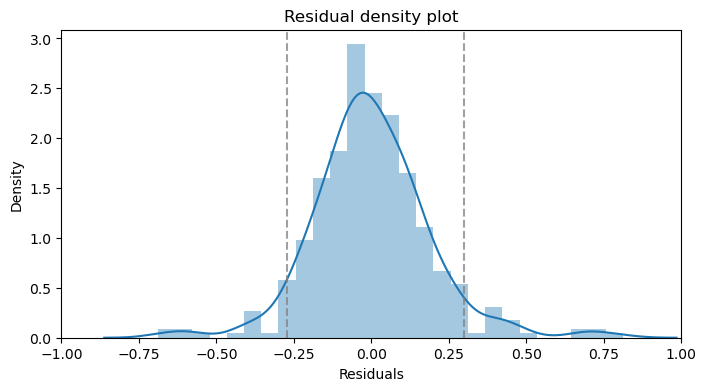

In [30]:
# Plot the histogram of the residuals
fig = plt.figure(figsize=(8,4))

sns.distplot(residual, kde = True)
plt.xlabel('Residuals')
plt.axvline(Residuals_limits[0], color = 'gray', alpha = 0.75, linestyle='--')
plt.axvline(Residuals_limits[1], color = 'gray', alpha = 0.75, linestyle='--')
plt.xlim([-1.0, 1.0])
plt.title("Residual density plot")

plt.show()

The shape of the densitiy of the residuals follows a normal distribution, hence **the second assumption is satisfied**.

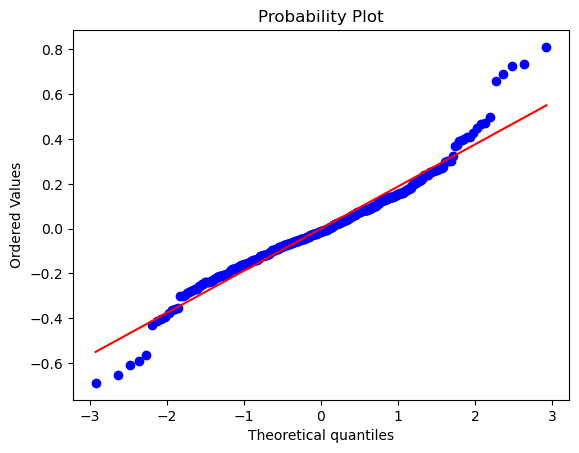

In [31]:
# Show the Quantile-Quantile (Q-Q) plot
stats.probplot(residual, dist = 'norm', plot = py)

plt.show()

Note that the data points from our dataset lie approximately in the straight line. Thus, we can conclude that the errors are normally distributed.

### 3. Homoscedasticity

In [32]:
# Perform the Goldfeldquandt test for homoscedasticity
import statsmodels.stats.api as sms

from statsmodels.compat import lzip

name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, x_train)

lzip(name, test)

[('F statistic', 1.0430733582484744), ('p-value', 0.3849358856033825)]

Note from the above test that the p-value is greater than 0.05, so we fail to reject the null-hypothesis. Thus, the residuals are homoscedastic and **the third assumption is satisfied**.

### 4. Linearity

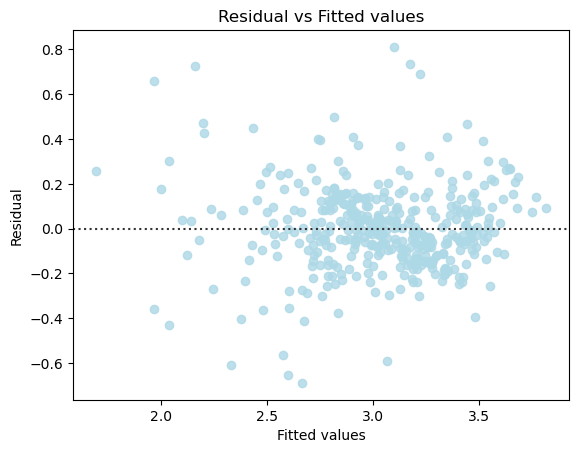

In [33]:
# Predicted values
fitted = ols_res_final.fittedvalues

sns.residplot(x = fitted, y = residual, color = "lightblue")

plt.xlabel("Fitted values")
plt.ylabel("Residual")
plt.title("Residual vs Fitted values")

plt.show()

Finally, note that here is no pattern in the residuals vs fitted values scatter plot, so **the linearity assumption is satisfied**.

## Final Model

The four assumptions of the linear regression model have been verified, and the final equation of the estimated model is the following:

**log(MEDV)** = 4.425 - 0.010∗**CRIM** + 0.107∗**CHAS** - 0.980∗**NOX** + 0.080∗**RM** - 0.043∗**DIS** + 0.005∗**RAD** - 0.045∗**PTRATIO** - 0.029∗**LSTAT**

In the next subsection, we will make final test predictions.

### Test Dataset

In [34]:
# Call the OLS algorithm on the 'test' features and target variable
ols_model_test = sm.OLS(y_test, x_test)

# Fit the Model
ols_res_test = ols_model_test.fit()

#### R-Squared and Mean Squared Error

In [35]:
print('R-Squared = ', round(ols_res_test.rsquared,4))
print('Mean Squared Error = ', round(ols_res_test.mse_resid, 4))

R-Squared =  0.7945
Mean Squared Error =  0.0406


Note that both the R-Squared (0.79) and the MSE (0.040) in the **test dataset** are very close to the R-Squared (0.77) and the MSE (0.037) in the **train dataset**.

#### Predicted vs Actual data

In [36]:
# These test predictions will be on a log scale
predict_test = ols_res_final.predict(x_test)

# We are converting the log scale predictions to its original scale (in the test and predict datasets)
predict_test = np.exp(predict_test)
y_test = np.exp(y_test)

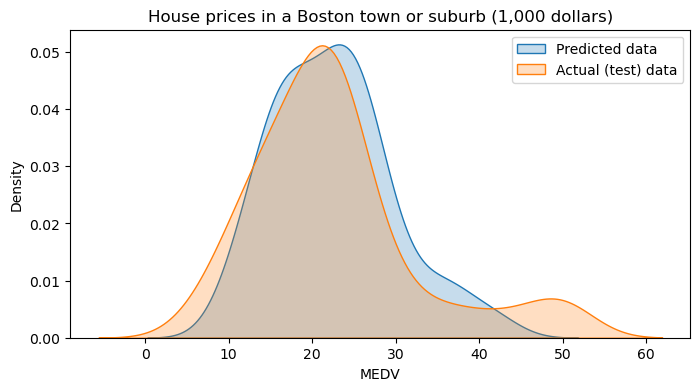

In [37]:
# Plot the predict_test with the y_test
fig = plt.figure(figsize=(8,4))

sns.distplot(predict_test, hist = False, kde = True, kde_kws = {'shade':True}, label = 'Predicted data')
sns.distplot(y_test, hist = False, kde = True, kde_kws = {'shade':True}, label = 'Actual (test) data')

plt.xlabel('MEDV')
plt.legend()
plt.title('House prices in a Boston town or suburb (1,000 dollars)')

plt.show()


**Observations:**

Note that the predictions generated by the model fit the actual (test) data well, particularly in the bulk of the distribution. However, the predicted data displays a shorter tail than the actual data.

We would also be interested in having a model that captures the tail (and kink) in the right-hand side of the distribution. This pattern in the distribution may owe itself to wealth effects (i.e., luxury property market) where some high-value properties are clustered together in specific locations across Boston.

For instance, the scatterplot between MEDV and LSTAT (displayed earlier) shows a non-linear relationship between these 2 variables. Low values of LSTAT (small percentages of population of low economic status) are associated with very high values of MEDV (house prices), although the relationship is smoother as LSTAT increases.

To model this singularity of the property market, we will transform LSTAT to determine if the model can approximate prices at the upper end of the house price distribution.

### Test Dataset - Model the tail of the house price distribution

In [38]:
# Apply a log-transformation to LSTAT and define the dependent variable
df['log_LSTAT'] = np.log(df['LSTAT'])


In [39]:
# Define the X and Y dataset
Y = df['log_MEDV']

X = df.drop(columns = {'MEDV', 'log_MEDV', 'ZN', 'INDUS', 'AGE', 'TAX', 'LSTAT'})

In [40]:
# Split the dataset into the train and test data with a 80:20 rule
x_train_transf, x_test_transf, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 1)


# Add the intercept term
x_train_transf = sm.add_constant(x_train_transf)
x_test_transf = sm.add_constant(x_test_transf)

In [41]:
# Call the OLS algorithm on the 'train' features (x_train) and train target variable (y_train)
ols_model_transf = sm.OLS(y_train, x_train_transf)

# Fit the Model
ols_res_transf = ols_model_transf.fit()

print(ols_res_transf.summary())

                            OLS Regression Results                            
Dep. Variable:               log_MEDV   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     183.7
Date:                Fri, 21 Jul 2023   Prob (F-statistic):          5.01e-128
Time:                        09:52:41   Log-Likelihood:                 106.15
No. Observations:                 404   AIC:                            -194.3
Df Residuals:                     395   BIC:                            -158.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9365      0.227     21.766      0.0

**Observations:**

Note that the coefficients in this model specification barely changed compared with the final model developed in the previous section. However, the interpretation and magnitude of **'log_LSTAT'** has changed.

**log_LSTAT**: A 1% increase in the proportion of the population of lower economic status translates into a 0.38% decrease in the house price.

Now, we will assess the evaluation metrics of this model.

In [42]:
# Call the OLS algorithm on the 'test' features and target variable
ols_model_test_transf = sm.OLS(y_test, x_test_transf)

# Fit the Model
ols_res_test_transf = ols_model_test_transf.fit()

In [43]:
print('R-Squared = ', round(ols_res_test_transf.rsquared,4))
print('Mean Squared Error = ', round(ols_res_test_transf.mse_resid, 4))

R-Squared =  0.8017
Mean Squared Error =  0.0391


**Observations:**

Note that in the test dataset, **the evaluation metrics show a marginal improvement**. The R-Squared is up to 0.80 (from 0.79), and the MSE is down to 0.03 (from 0.04).

Now, we will plot the density distribution of the **predicted data vs the test data** for the **modified model**.

In [44]:
# These test predictions will be on a log scale
predict_test_transf = ols_res_transf.predict(x_test_transf)


# We are converting the log scale predictions to its original scale (in the test and predict datasets)
predict_test_transf = np.exp(predict_test_transf)
y_test = np.exp(y_test)

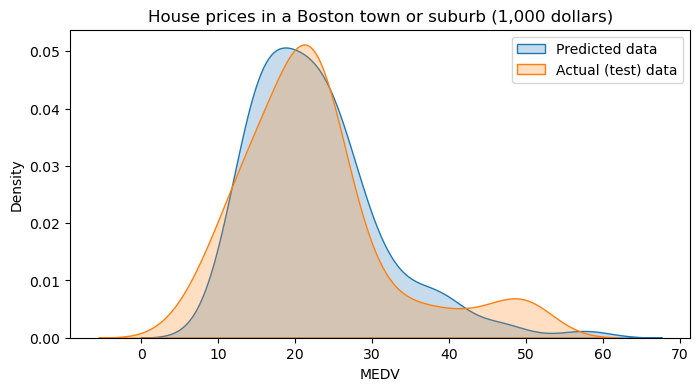

In [45]:
# Plot the predict_test with the y_test
fig = plt.figure(figsize=(8,4))

sns.distplot(predict_test_transf, hist = False, kde = True, kde_kws = {'shade':True}, label = 'Predicted data')
sns.distplot(y_test, hist = False, kde = True, kde_kws = {'shade':True}, label = 'Actual (test) data')

plt.xlabel('MEDV')
plt.legend()
plt.title('House prices in a Boston town or suburb (1,000 dollars)')

plt.show()


**Observations:**

Note that the predictions generated by this model fit the actual (test) data slightly better than the previous model. And the tail of the distribution of predicted data extends to incorporate more extreme price values.

The user can also verify that, with this model specification, there is no multicollinearity among the independent variables and that the assumptions of linear regression are satisfied.

We conclude that **transforming the LSTAT variable to model the upper tail of the distribution results in marginal gains across the evaluation metrics of the final model**.

### Modified Model

Therefore, for users interested in modelling the upper tail of the house price distribution, the **modified model** would be as follows:

**log(MEDV)** = 4.936 - 0.012∗**CRIM** + 0.104∗**CHAS** - 0.898∗**NOX** + 0.056∗**RM** - 0.043∗**DIS** + 0.004∗**RAD** - 0.037∗**PTRATIO** - 0.038∗**log(LSTAT)**

## Actionable Insights and Recommendations 

- We conducted Exploratory Data Analysis (EDA) and implemented a Machine Learning Model (Regression) to predict house prices across Boston localities, based on an initial set of 12 attributes. The final model specification included 8 attributes and we highlight the following results:
    
    - Model assumptions were satisfied
    - Evaluation metrics showed that the model fits the data well, both in the train and test datasets
    - The estimated coefficients are statistically significant

- The direction of change of the attributes incorporated in the final model predicts movements in house prices that are consistent with economic and social dynamics. For instance:

    - House prices are positively related to their proximity to the river, access to radial highways and the larger number of rooms
    - House prices are negatively related to higher crime rates, pollution, distance to employment centers and socioeconomic metrics, such as teacher-to-pupil ratio and proportion of the population with low economic status

- Given that property markets tend to mimic the household income distribution of a population, we noticed a clustering pattern of high-value properties at the upper end of the house price distribution in this dataset. This situation may be due to a non-linear relationship between house prices and the proportion of the population with low economic status.

- To observers interested in predicting house prices at the upper-end of the distribution, we refined the model with an alternative specification to account for non-linearities between house prices and a proxy for income distribution. The modified model displayed evaluation metrics marginally better than the final model (without the modification). And the sign and magnitude of the coefficients in the modified model remained largely unaltered. However, the model can now predict prices for high-value properties in Boston.

- The insights derived from these models are relevant for property valuations in real estate investment vehicles, insurance companies or letting agencies. To improve the model prediction capability, we suggest incorporating more attributes that could shed light on house pricing dynamics, such as square footage, total number of floors, and quality ratings about the state of the property.

### Code written by C.AriasOrtega

___